In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('clean_data_solar.csv')
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
Radiation                 32686 non-null float64
Temperature               32686 non-null int64
Pressure                  32686 non-null float64
Humidity                  32686 non-null int64
WindDirection(Degrees)    32686 non-null float64
Speed                     32686 non-null float64
Total_TimeSun             32686 non-null int64
Month                     32686 non-null int64
Days                      32686 non-null int64
hour                      32686 non-null int64
Date_time                 32686 non-null object
dtypes: float64(4), int64(6), object(1)
memory usage: 2.7+ MB
None


,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Total_TimeSun,Month,Days,hour,Date_time
0,1.21,48,30.46,59,177.39,5.62,12,9,29,23,2016-09-29
1,1.21,48,30.46,58,176.78,3.37,12,9,29,23,2016-09-29
2,1.23,48,30.46,57,158.75,3.37,12,9,29,23,2016-09-29
3,1.21,48,30.46,60,137.71,3.37,12,9,29,23,2016-09-29
4,1.17,48,30.46,62,104.95,5.62,12,9,29,23,2016-09-29


In [3]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import metrics

In [5]:
df1 = df.drop(['Date_time'],axis=1)
X = df1.drop('Radiation',axis=1)
y = df1['Radiation']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

MAE: 146.93272984181922
MSE: 37397.607797517
RMSE: 193.38461106695382
R2 Score 0.6296742910380527


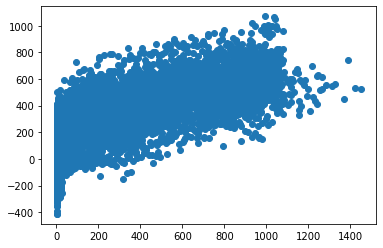

In [7]:
rim = Ridge(alpha=0.1)
rim.fit(X_train,y_train)
prediction_ridge = rim.predict(X_test)
plt.scatter(y_test, prediction_ridge)
print('MAE:' , metrics.mean_absolute_error(y_test, prediction_ridge))
print('MSE:', metrics.mean_squared_error(y_test, prediction_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_ridge)))
print('R2 Score', metrics.r2_score(y_test, prediction_ridge))

In [8]:
prediction_ridge

array([  23.55979989, -154.8708912 ,  497.59517538, ...,   28.46183686,
        186.69743421,   36.66604047])

MAE: 146.98245386146576
MSE: 37396.77341721919
RMSE: 193.38245374702223
R2 Score 0.6296825533974261


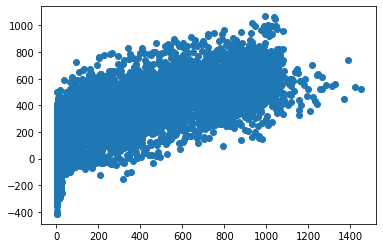

In [9]:
llm = Lasso(alpha = 0.1)
llm.fit(X_train,y_train)
prediction_lasso = llm.predict(X_test)
plt.scatter(y_test, prediction_lasso)
print('MAE:' , metrics.mean_absolute_error(y_test, prediction_lasso))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lasso)))
print('R2 Score', metrics.r2_score(y_test, prediction_lasso))

In [10]:
prediction_lasso

array([  21.11970816, -154.45830977,  500.47123865, ...,   30.12056839,
        186.55431032,   36.31520953])

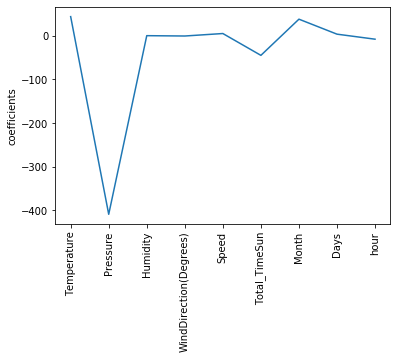

In [11]:
_ = plt.plot(range(len(X_train.columns)), llm.coef_)
_ = plt.xticks(range(len(X_train.columns)), X_train.columns, rotation = 90)
_ = plt.ylabel('coefficients')
plt.show()

In [12]:
import statsmodels.api as sm
from statsmodels.api import OLS
sm_lm = OLS(y_train, sm.add_constant(X_train))
result = sm_lm.fit()
result.summary()

C:\Users\Sabam-Mr\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     4248.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:07:01   Log-Likelihood:            -1.5285e+05
No. Observations:               22880   AIC:                         3.057e+05
Df Residuals:                   22870   BIC:                         3.058e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    1.19e+04    843.785     14.098      0.000    1.02e+04    1.35e+04
Temperature               44.3189      0.251    176.425      0.000      43.827      44.811
Pressure                -454.5706     27.057    -16.801      0.000    -507.604    -401.537
Humidity                   0.5442      0.056      9.722      0.000       0.434       0.654
WindDirection(Degrees)    -0.2270      0.017    -13.749      0.000      -0.259      -0.195
Speed                      5.4241      0.383     14.160      0.000       4.673       6.175
Total_TimeSun            -47.0037      4.835     -9.721      0.000     -56.481     -37.526
Month                     37.0471      2.141     17.305      0.000      32.851      41.243
Days                       3.9853      0.161     24.756      0.000       3.670       4.301
hour                      -7.4964      0.192    -39.063      0.000      -7.873      -7.120
==============================================================================
Omnibus:                     2120.612   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3451.230
Skew:                           0.684   Prob(JB):                         0.00
Kurtosis:                       4.323   Cond. No.                     1.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values,j) for j in range(X_train.shape[1])]
pd.Series(vif, index = X_train.columns, name='VIF')

Temperature                102.201187
Pressure                  3160.809207
Humidity                    11.652856
WindDirection(Degrees)       4.506307
Speed                        4.585983
Total_TimeSun             1727.617664
Month                      267.304148
Days                         5.148221
hour                         4.070846
Name: VIF, dtype: float64

In [14]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

In [15]:
# scaler = StandardScaler()
# x_num = scaler.fit(X_train)
# x_num_scaled = x_num.transform(X_train)
# x_scaled = pd.DataFrame(x_num_scaled, columns = X.columns)

# x_test_scale = x_num.transform(X_test)

In [16]:
# x_scaled

In [17]:
# pca = PCA(n_components=2)
# pca_transformer = pca.fit(x_scaled)
# x_pca18 = pca_transformer.transform(x_scaled)

# pca_test = pca_transformer.transform(x_test_scale)
# # X1_train, X1_test, y1_train, y1_test = train_test_split(x_pca18,y,test_size=0.3,random_state = 101)

In [ ]:
# from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# from sklearn.model_selection import cross_val_score,train_test_split
# from sklearn import metrics

In [ ]:

# sns.distplot(df['Radiation'])

In [ ]:
# sm_lm = RandomForestRegressor()
# sm_lm.fit(x_pca18,y_train)
# predictions_pca = sm_lm.predict(pca_test)
# print('MAE:' , metrics.mean_absolute_error(y_test, predictions_pca))
# print('MSE:', metrics.mean_squared_error(y_test, predictions_pca))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_pca)))
# print('R2 Score', metrics.r2_score(y_test, predictions_pca))

In [ ]:
# pca_test

In [ ]:
# df.info()

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

xgb = XGBRegressor()
learningrate=[0.01,0.03,0.05,0.1] 
nestimators=[100,200,300]
maxdepth=[4,5,6] 
minchildweight=[4,5] 
gamma=[i/10.0 for i in range(3,6)] 
subsample=[i/10.0 for i in range(6,10)] 
colsamplebytree=[i/10.0 for i in range(6,10)]

xgbparamsgrid=dict(learningrate=learningrate,
                    nestimators=nestimators,
                    maxdepth=maxdepth,
                    minchildweight=minchildweight,
                    gamma=gamma,
                    subsample=subsample,
                    colsamplebytree=colsamplebytree)

In [23]:
gridsearch=GridSearchCV(xgb,xgbparamsgrid,cv=5,n_jobs=-1,verbose=10) 

In [25]:
# gridsearch.fit(X_train,y_train)